In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from IPython.display import HTML, SVG
import numpy as np
from svgpath2mpl import parse_path

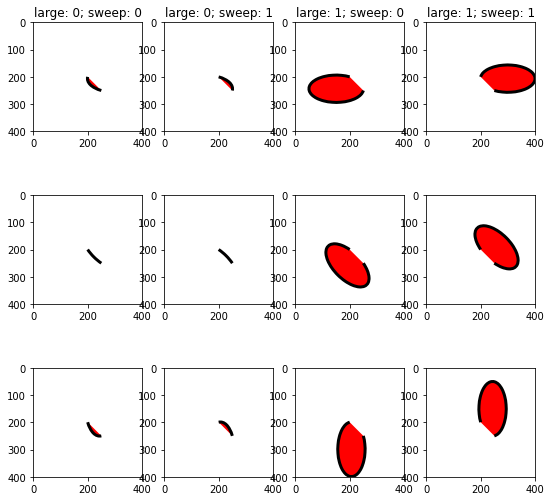

In [3]:
rx, ry = 100, 50
xi, yi = 200, 200
xf, yf = 50, 50
SVG_TEMPLATE = """
<svg height="400" width="400" stroke="black" fill="red" style="stroke-width:3;border:1px solid black;">
  <path d="{d}" />
</svg>
"""

fig = plt.figure(figsize=(9, 9))
gs = plt.GridSpec(nrows=3, ncols=4)

svgs = []
i = 0
for rotation in (0, 45, 270):
    for large in (0, 1):
        for sweep in (0, 1):
            d = f'M {xi},{yi}  a{rx},{ry} {rotation} {large},{sweep} {xf},{yf}'
            svgs.append(SVG_TEMPLATE.format(d=d))
            path = parse_path(d)
            ax = plt.subplot(gs[i])
            patch = mpl.patches.PathPatch(
                path, 
                facecolor='r', 
                edgecolor='k', 
                linewidth=3)
            patch.set_transform(ax.transData);
            ax.add_patch(patch);
            ax.set_aspect(1);
            ax.set_xlim(0, 400);
            ax.set_ylim(400, 0);
            if i in range(4):
                ax.set_title(f"large: {large}; sweep: {sweep}")
            i += 1


In [4]:
grid = '<div style="display: grid; grid-template-columns: auto auto auto auto;">'
for svg in svgs:
    grid += f"<div>{svg}</div>"
grid += "</div>"
HTML(grid)

### Ice cream

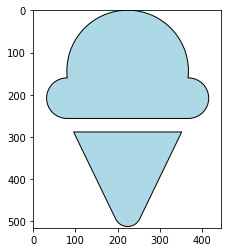

In [5]:
d = 'M368 160h-.94a144 144 0 1 0-286.12 0H80a48 48 0 0 0 0 96h288a48 48 0 0 0 0-96zM195.38 493.69a31.52 31.52 0 0 0 57.24 0L352 288H96z'
path = parse_path(d)

fig, ax = plt.subplots(nrows=1, ncols=1)
patch = mpl.patches.PathPatch(
    path, 
    facecolor='lightblue', 
    edgecolor='black', 
    linewidth=1)
patch.set_transform(ax.transData);
ax.add_patch(patch);
ax.set_aspect(1);
ax.set_xlim(0, 445);
ax.set_ylim(515, 0);

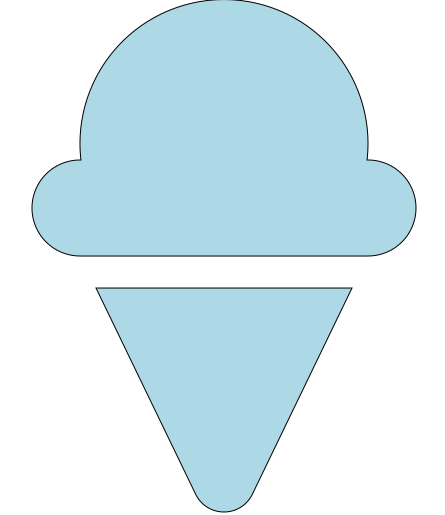

In [6]:
SVG(data=f"""
<svg height="515" width="445" stroke="black" fill="lightblue" style="stroke-width:1;border:1px solid black;">
  <path d="{d}" />
</svg>""")